# Python Tricks

In [4]:
import pandas as pd
import numpy as np

## Plot Coordinates on Google Map

* Download the data from: https://drive.google.com/file/d/1VS292bhx_caAamNGY1bRrAySABMNSAhH/view?usp=sharing
* About gmplot: https://github.com/vgm64/gmplot

In [2]:
import gmplot

df = pd.read_csv('3D_spatial_network.csv')
print(df.shape)
df.head()

(434874, 4)


,OSM_ID,LONGITUDE,LATITUDE,ALTITUDE
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974


In [3]:
sample_longitude_lst = df['LONGITUDE'][0:1000]
sample_latitude_lst =df['LATITUDE'][0:1000]

longitude_center = np.mean(sample_longitude_lst)
latitude_center = np.mean(sample_latitude_lst)
print(longitude_center, latitude_center)

9.73544303649998 56.97827767209999


In [4]:
# center the coordinates on Google map
gmap = gmplot.GoogleMapPlotter(latitude_center, longitude_center, 10)  # 10 is screen resolution
gmap.scatter(sample_latitude_lst, sample_longitude_lst, '# FF0000', size=40, marker=True)
gmap.heatmap(sample_latitude_lst, sample_longitude_lst)

gmap.draw("test_map.html")

Populating the interactive namespace from numpy and matplotlib


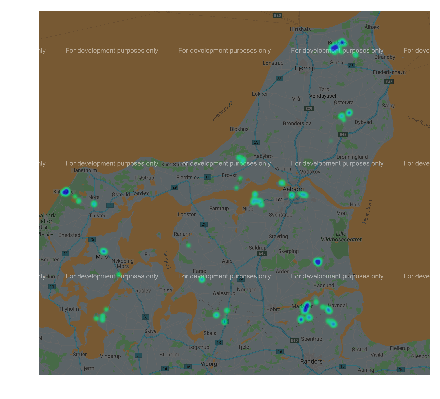

In [9]:
%pylab inline
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('test_map_plot.png', cv2.IMREAD_COLOR)
plt.figure(figsize = (7,7))
pylab.imshow(img)
pylab.axis('off')
pylab.show()

## Show Progress Bar for the Running Code

* About `tqdm`: https://github.com/tqdm/tqdm
* About "Python Spatial Analysis Library": https://github.com/pysal/pysal
  * API Reference: https://pysal.org/pysal/api.html
  * Examples for difference modules: https://github.com/pysal/pysal/tree/master/notebooks
  * This library looks cool
* Download the data from: https://drive.google.com/file/d/1VS292bhx_caAamNGY1bRrAySABMNSAhH/view?usp=sharing

In [3]:
from tqdm._tqdm_notebook import tqdm_notebook
from pysal.lib.cg import harcdist

In [4]:
tqdm_notebook.pandas()

df = pd.read_csv('3D_spatial_network.csv')
print(df.shape)
df.head()

(434874, 4)


,OSM_ID,LONGITUDE,LATITUDE,ALTITUDE
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974


In [5]:
sample_longitude_lst = df['LONGITUDE'][0:1000]
sample_latitude_lst =df['LATITUDE'][0:1000]

longitude_center = np.mean(sample_longitude_lst)
latitude_center = np.mean(sample_latitude_lst)
print(longitude_center, latitude_center)

9.73544303649998 56.97827767209999


In [6]:
def calculate_dist(r):
    return harcdist((r['LONGITUDE'], r['LATITUDE']), (longitude_center, latitude_center))

df['dist2center'] = df.progress_apply(calculate_dist, axis=1)

#### NOTE
* In order to display the progress bar above, here're what I tried, not sure which one made it work...
  * Type `jupyter trust notebook-name.ipynb` in terminal before launching ipython notebook, this is to trust the notebook
  * Install `nodejs`, `nmp` through conda
  * Downgrade ipywidgets through `pip install ipywidgets==6.0.0`
  * Type `jupyter labextension install @jupyter-widgets/jupyterlab-manager` in the terminal before launching ipython notebook
    * This one got stuck, but not sure whether it helps, since it has highest vote in https://github.com/tqdm/tqdm/issues/451

## Check Runtime for an IPython Block

* Just use `%%time`

In [7]:
%%time

def calculate_dist(r):
    return harcdist((r['LONGITUDE'], r['LATITUDE']), (longitude_center, latitude_center))

df['dist2center'] = df.apply(calculate_dist, axis=1)

Wall time: 10.1 s


In [8]:
%%time
df.head()

Wall time: 0 ns


,OSM_ID,LONGITUDE,LATITUDE,ALTITUDE,dist2center
0,144552912,9.349849,56.740876,17.052772,35.302670
1,144552912,9.350188,56.740679,17.614840,35.305405
2,144552912,9.350549,56.740544,18.083536,35.302072
3,144552912,9.350806,56.740484,18.279465,35.296718
4,144552912,9.351053,56.740486,18.422974,35.286599


## Interactive Plot in IPython

* Just need `%matplotlib notebook` in IPython

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('3D_spatial_network.csv')
print(df.shape)
df.head()

(434874, 4)


,OSM_ID,LONGITUDE,LATITUDE,ALTITUDE
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974


<IPython.core.display.Javascript object>


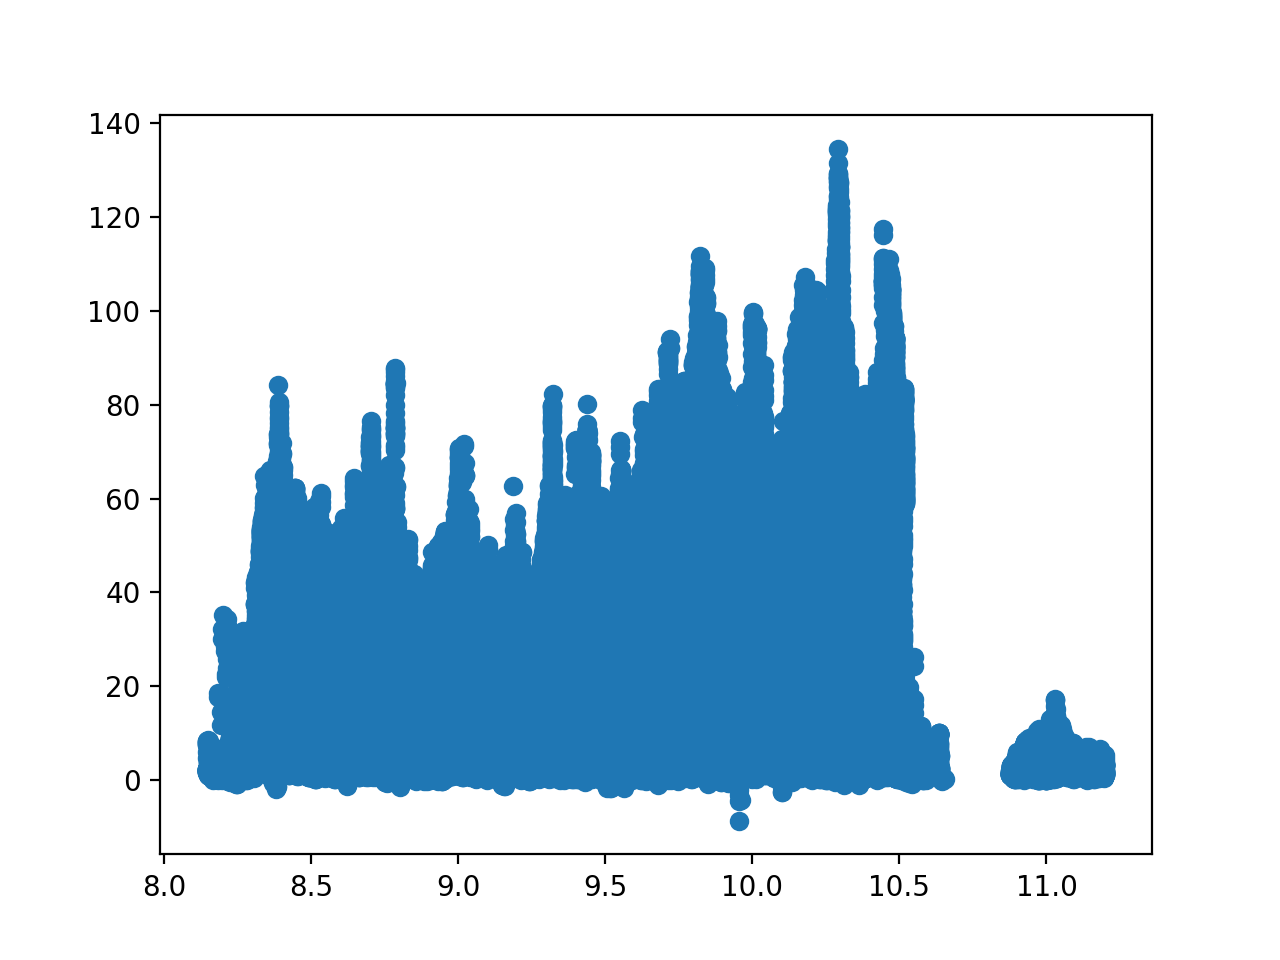

In [4]:
plt.scatter(df['LONGITUDE'],df['ALTITUDE'])

## Group By Time Series

* Download the data from: https://drive.google.com/file/d/1UXHlP2TcenRFQJi5ZoaFtWpRuSU6AwQk/view
* Group by time series
* Unstack groupby results, to convert index into columns

In [9]:
df = pd.read_excel('sales-data.xlsx')
print(df.shape)
df.head()

(1500, 3)


,name,ext price,date
0,Barton LLC,3380.91,2014-01-01 07:21:51
1,Trantow-Barrows,-63.16,2014-01-01 10:00:47
2,Kulas Inc,2086.10,2014-01-01 13:24:58
3,"Kassulke, Ondricka and Metz",863.05,2014-01-01 15:05:22
4,Jerde-Hilpert,499.26,2014-01-01 23:26:55


In [12]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,name,ext price,date
0,Barton LLC,3380.91,2014-01-01 07:21:51
1,Trantow-Barrows,-63.16,2014-01-01 10:00:47
2,Kulas Inc,2086.10,2014-01-01 13:24:58
3,"Kassulke, Ondricka and Metz",863.05,2014-01-01 15:05:22
4,Jerde-Hilpert,499.26,2014-01-01 23:26:55


In [13]:
df.dtypes

name                 object
ext price           float64
date         datetime64[ns]
dtype: object

### Group By with `Grouper`

* group by month, in this case

In [20]:
# using groupby need to reset index
df.set_index('date').groupby('name')["ext price"].resample("M").sum().head(n=15)

name                             date      
Barton LLC                       2014-01-31     6177.57
                                 2014-02-28    12218.03
                                 2014-03-31     3513.53
                                 2014-04-30    11474.20
                                 2014-05-31    10220.17
                                 2014-06-30    10463.73
                                 2014-07-31     6750.48
                                 2014-08-31    17541.46
                                 2014-09-30    14053.61
                                 2014-10-31     9351.68
                                 2014-11-30     4901.14
                                 2014-12-31     2772.90
Cronin, Oberbrunner and Spencer  2014-01-31     1141.75
                                 2014-02-28    13976.26
                                 2014-03-31    11691.62
Name: ext price, dtype: float64

In [19]:
# using Grouper, no need to reset index
df.groupby(['name', pd.Grouper(key='date', freq='M')])['ext price'].sum().head(n=15)

name                             date      
Barton LLC                       2014-01-31     6177.57
                                 2014-02-28    12218.03
                                 2014-03-31     3513.53
                                 2014-04-30    11474.20
                                 2014-05-31    10220.17
                                 2014-06-30    10463.73
                                 2014-07-31     6750.48
                                 2014-08-31    17541.46
                                 2014-09-30    14053.61
                                 2014-10-31     9351.68
                                 2014-11-30     4901.14
                                 2014-12-31     2772.90
Cronin, Oberbrunner and Spencer  2014-01-31     1141.75
                                 2014-02-28    13976.26
                                 2014-03-31    11691.62
Name: ext price, dtype: float64

### Unstack, index to columns

In [21]:
df.groupby(['name', pd.Grouper(key='date', freq='M')])['ext price'].sum().unstack()

date,2014-01-31 00:00:00,2014-02-28 00:00:00,2014-03-31 00:00:00,2014-04-30 00:00:00,2014-05-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-09-30 00:00:00,2014-10-31 00:00:00,2014-11-30 00:00:00,2014-12-31 00:00:00
name,,,,,,,,,,,,
Barton LLC,6177.57,12218.03,3513.53,11474.20,10220.17,10463.73,6750.48,17541.46,14053.61,9351.68,4901.14,2772.90
"Cronin, Oberbrunner and Spencer",1141.75,13976.26,11691.62,3685.44,6760.11,5379.67,6020.30,5399.58,12693.74,9324.37,6021.11,7640.60
"Frami, Hills and Schmidt",5112.34,4124.53,10397.44,5036.18,4097.87,13192.19,13177.81,7803.08,8634.88,8522.44,7221.02,16249.81
"Fritsch, Russel and Anderson",15130.77,9595.35,5153.80,9302.57,11347.23,7722.40,13278.82,340.08,11078.79,10686.18,6233.08,12345.64
"Halvorson, Crona and Champlin",9997.17,7082.15,9610.91,5591.84,2284.79,3648.32,10411.53,4194.44,4947.29,5318.22,4017.19,2900.51
Herman LLC,10749.84,5831.40,6359.58,4379.21,2529.40,5566.85,10194.26,3018.32,19250.86,5271.59,5049.15,4664.54
Jerde-Hilpert,11274.33,4088.40,15254.78,7827.74,10049.22,12008.45,9106.47,8985.41,8524.98,11401.27,7128.39,6941.99
"Kassulke, Ondricka and Metz",7322.83,3061.12,10159.76,8368.10,2183.27,5928.93,6204.91,7383.14,12449.53,10127.44,8836.82,4425.22
Keeling LLC,6847.86,3383.45,17110.10,8937.57,11932.89,9798.46,13617.19,1340.90,3488.91,918.13,10310.96,13247.88


## Auto Generate Data Report

* Majorly are details for each features
* It seems that correlations cannot be shown even if all features are numerical

In [3]:
import pandas_profiling

In [4]:
df = pd.read_csv('train1.csv')
print(df.shape)
df.head()

(54808, 14)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
%%time

pandas_profiling.ProfileReport(df)

C:\Users\hanhan\Anaconda3\lib\site-packages\pandas_profiling\describe.py:404: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Wall time: 4.88 s


Number of variables,14
Number of observations,54808
Total Missing (%),0.9%
Total size in memory,5.9 MiB
Average record size in memory,112.0 B
Numeric,6
Categorical,5
Boolean,3
Date,0
Text (Unique),0
Rejected,0


In [9]:
%%time

pandas_profiling.ProfileReport(df.iloc[:, 7:10])

C:\Users\hanhan\Anaconda3\lib\site-packages\pandas_profiling\describe.py:404: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Wall time: 2.55 s


Number of variables,3
Number of observations,54808
Total Missing (%),2.5%
Total size in memory,1.3 MiB
Average record size in memory,24.0 B
Numeric,3
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


## <s>R & Python Together</s>

* It seems that same dataframe can be used by R and Python here

* rpy2 doesn't officially support Windows so far, unless you install unofficial binaries, which requires to install multiple .whl files. No better just use Linux to install in virtual environment.
* In order to make `%load_ext rpy2.ipython`, have to use `conda install -c r rpy2` before starting youre ipython, otherwise won't work

❌❌
* Till now I haven't found a way to install/require R libraries through rpy2 yet.
* Also it seems that you cannot use `<-` symbol for R here

In [2]:
%load_ext rpy2.ipython
%R require(ggplot2)

/Users/hanhanwu/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)


array([0], dtype=int32)

In [6]:
df = pd.DataFrame({
        'Class': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C'],
        'X': [4, 3, 5, 2, 1, 7, 7, 5],
        'Y': [0, 4, 3, 6, 7, 10, 11, 9],
        'Z': [1, 2, 3, 1, 2, 3, 1, 2]
    })
df

,Class,X,Y,Z
0,A,4,0,1
1,A,3,4,2
2,A,5,3,3
3,B,2,6,1
4,B,1,7,2
5,B,7,10,3
6,C,7,11,1
7,C,5,9,2


In [10]:
%R -i df

df['W'] = df['X']+df['Y']
df.head()

,Class,X,Y,Z,W
0,A,4,0,1,4
1,A,3,4,2,7
2,A,5,3,3,8
3,B,2,6,1,8
4,B,1,7,2,8
